In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Método Trapezoidal

$$ \int_{a}^{b}f(x) dx \sim  \Delta x \left( \frac{1}{2} \left[ f(x_0) + f(x_N) \right] +  \sum_{i=1}^{N-1} f(x_i) \right)  $$

### Vamos usar como exemplo a função  $ f(x) = x^4 -2x + 1 $

In [2]:
def f(x):
    f = x**4 - 2*x + 1
    return f

In [3]:
def trapezio(f,a,b,N):
    
#Implementação da integral trapezoidal; 
#f é a função a ser integrada, 
#a e b são os limites do intervalo  de integração. 
#N é o número de pontos avaliados.
 
    h = (b-a)/N
    soma = (f(a) + f(b))/2.0
    for i in range(1,N):
        soma = soma + f(a + i * h)
    return soma * h    

In [4]:
N = 10
a = 0
b = 2
I = trapezio(f,a,b,N)

In [5]:
print(I)

4.50656


## Testando o resultado da integral em função do número de intervalos (N)

In [6]:
NN = np.array([10, 20, 40, 80, 160, 320, 640, 1280, 2560])

II = []
for N in NN:
    II.append(trapezio(f,a,b,N))
II_t = np.asarray(II)

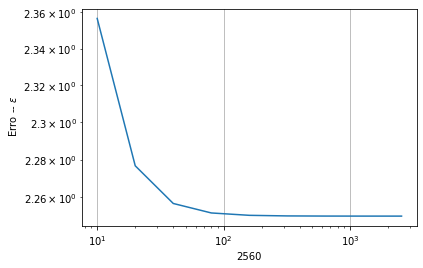

In [10]:
valor_exato = 2.15 # Valor exato da integral

plt.loglog(NN,II_t - valor_exato)
plt.ylabel(r' Erro -- $\varepsilon$')
plt.xlabel(N)
plt.grid()

## Método de Simpson

$$ I(a,b) = \frac{h}{3}(f(a) + f(b)) + \frac{h}{3} \left[ 4 \sum_{odd, j=1}^{N-1}f(a+jh) + 2 \sum_{even, i=2}^{N-2}f(a+ih)\right] $$ 

In [11]:
def simpson(f,a,b,N):
    h = (b-a)/N
    S_1 = (f(a) + f(b))* h/3.0
    
    S_2 = 0
    
    for i in range(2,N,2):
        S_2 = S_2 + 2 * f(a + i*h)
    S_3 = 0
    
    for j in range(1,N,2):
        S_3 = S_3 + 4 * f(a + j*h)    
    
    soma = S_1 + (S_2 + S_3)*h/3.0
    return soma 

In [21]:
NN = np.array([10, 20, 40, 80, 160, 320, 640, 1280, 2560])

II = []
for N in NN:
    II.append(simpson(f,a,b,N))
II_s = np.asarray(II)

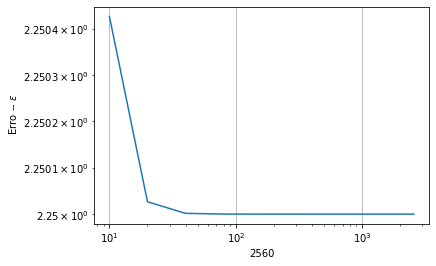

In [22]:
valor_exato = 2.15 # Valor exato da integral

plt.loglog(NN,II_s - valor_exato)
plt.ylabel(r' Erro -- $\varepsilon$')
plt.xlabel(N)
plt.grid()

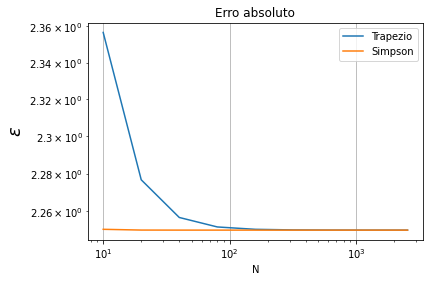

In [23]:
plt.loglog(NN,II_t - valor_exato, label = 'Trapezio' )
plt.loglog(NN,II_s - valor_exato, label = 'Simpson'  )
plt.ylabel(r'$\varepsilon$', size = 18)
plt.xlabel('N')
plt.title('Erro absoluto')
plt.grid()
plt.legend()
plt.show()

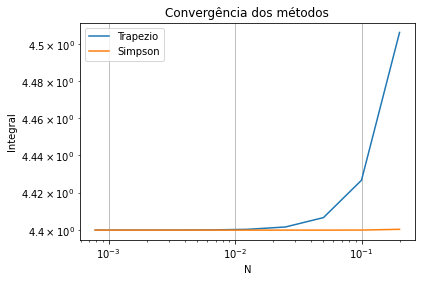

In [20]:
H = (b-a)/NN
plt.loglog(H,II_t, label = 'Trapezio')
plt.loglog(H,II_s, label = 'Simpson' )
#plt.ylim([4.399, 4.405])
#plt.xlim([1,100])
plt.ylabel('Integral')
plt.xlabel('N')
plt.title('Convergência dos métodos')
plt.grid()
plt.legend()
plt.show()

In [24]:
1.0 - 1e-17

1.0